**Goal**: ​Get familiar with gradient-based and derivative-free optimization by implementing these methods and applying them to a given function.

Learn about **gradient-based** (GD) optimization methods and **derivative-free optimization** (DFO) methods. The goal is to implement these methods (one from each group) and analyze their behavior. Importantly, we aim at noticing differences between these two groups of methods.

Here, we are interested in ​minimizing​ the following function:

$$
f(\mathbf{x})=x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7
$$

in the domain $\mathbf{x} = (x_1, x_2) \in [-100, 100]^{2}$ (i.e., $x_1 \in [-100, 100]$, $x_2 \in [-100, 100]$).

In this assignemnt, you are asked to implement:
1. The gradient-descent algorithm.
2. A chosen derivative-free algorithm. *You are free to choose a method.*

## 1. Understanding the objective

Please run the code below and visualize the objective function. Please try to understand the objective function, what is the optimum (you can do it by inspecting the plot).

If any code line is unclear to you, please read on that in numpy or matplotlib docs.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# PLEASE DO NOT REMOVE!
# The objective function.
def f(x):
    return x[:,0]**2 + 2*x[:,1]**2 -0.3*np.cos(3.*np.pi*x[:,0])-0.4*np.cos(4.*np.pi*x[:,1])+0.7

In [4]:
# PLEASE DO NOT REMOVE!
# Calculating the objective for visualization.
def calculate_f(x1, x2):
  f_x = []
  for i in range(len(x1)):
    for j in range(len(x2)):
      f_x.append(f(np.asarray([[x1[i], x2[j]]])))
    
  return np.asarray(f_x).reshape(len(x1), len(x2))

In [5]:
# PLEASE DO NOT REMOVE!
# Define coordinates
x1 = np.linspace(-100., 100., 400)
x2 = np.linspace(-100., 100., 400)

# Calculate the objective
f_x = calculate_f(x1, x2).reshape(len(x1), len(x2))

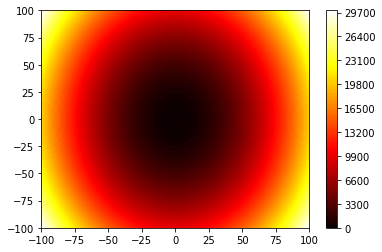

In [6]:
# PLEASE DO NOT REMOVE!
# Plot the objective
plt.contourf(x1, x2, f_x, 100, cmap='hot')
plt.colorbar()

## 2. The gradient-descent algorithm

First, you are asked to implement the gradient descent (GD) algorithm. Please take a look at the class below and fill in the missing parts.

NOTE: Please pay attention to the inputs and outputs of each function.

NOTE: To implement the GD algorithm, we need a gradient with respect to $\mathbf{x}$ of the given function. Please calculate it on a paper and provide the solution below. Then, implement it in an appropriate function that will be further passed to the GD class.

**Question 1 (0-1pt):** What is the gradient of the function $f(\mathbf{x})$?

**Answer:**
f was the following:
$$
f(\mathbf{x})=x_{1}^{2}+2 x_{2}^{2}-0.3 \cos \left(3 \pi x_{1}\right)-0.4 \cos \left(4 \pi x_{2}\right)+0.7 \\
$$

\begin{align*}
\nabla_{\mathbf{x}_1} f(\mathbf{x}) &=  2x_1 + 0.3*3*\pi * \sin(3\pi x_1)  \\
\nabla_{\mathbf{x}_2} f(\mathbf{x}) &= 4x_2 + 0.4*4*\pi * \sin(4\pi x_2)  \\
\end{align*}

In [11]:
#=========
# GRADING:
# 0
# 0.5pt - if properly implemented and commented well
#=========
# Implement the gradient for the considered f(x).
def grad(x):
  #------
  # PLEASE FILL IN:
  grad_x1 = 2*x[:,0] - 0.3*3*np.pi*np.sin(3*np.pi*x[:,0])
  grad_x2 = 4*x[:,1] - 0.4*4*np.pi*np.sin(4*np.pi*x[:,1])
  grad = np.vstack((grad_x1, grad_x2)).T
  #------
  return grad

In [12]:
#=========
# GRADING:
# 0
# 0.5pt if properly implemented and commented well
#=========
# Implement the gradient descent (GD) optimization algorithm. 
# It is equivalent to implementing the step function.
class GradientDescent(object):
  def __init__(self, grad, step_size=0.1):
    self.grad = grad
    self.step_size = step_size    

  def step(self, x_old):
    #------
    # PLEASE FILL IN:
    # gradient descent step
    x_new = x_old - self.step_size*self.grad(x_old)
    #------
    return x_new

In [13]:
# PLEASE DO NOT REMOVE!
# An auxiliary function for plotting.
def plot_optimization_process(ax, optimizer, title):
  # Plot the objective function
  ax.contourf(x1, x2, f_x, 100, cmap='hot')

  # Init the solution
  x = np.asarray([[90., -90.]])
  x_opt = x
  # Run the optimization algorithm
  for i in range(num_epochs):
    x = optimizer.step(x)
    x_opt = np.concatenate((x_opt, x), 0)

  ax.plot(x_opt[:,0], x_opt[:,1], linewidth=3.)
  ax.set_title(title)

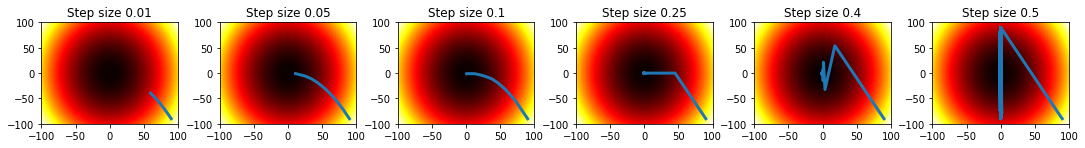

In [14]:
# PLEASE DO NOT REMOVE!
# This piece of code serves for the analysis.
# Running the GD algorithm with different step sizes
num_epochs = 20 # the number of epochs
step_sizes = [0.01, 0.05, 0.1, 0.25, 0.4, 0.5] # the step sizes

# plotting the convergence of the GD
fig_gd, axs = plt.subplots(1,len(step_sizes),figsize=(15, 2))
fig_gd.tight_layout()

for i in range(len(step_sizes)):
  # take the step size
  step_size = step_sizes[i]
  # init the GD
  gd = GradientDescent(grad, step_size=step_size)
  # plot the convergence
  plot_optimization_process(axs[i], optimizer=gd, title='Step size ' + str(gd.step_size))

**Question 2 (0-0.5pt)**: Please analyze the plots above and comment on the behavior of the gradient-descent for different values of the step size.

**Answer**: 
| Step size | Analysis |
|-----------|----------|
| 0.01    | The algorithm could not converge to minimum in the epoch limit. This can be explained by the fact that the step size is too small. |
| 0.05 | It converges to the minimum in nice way in the sense that the function value is decreasing and does not show any oscillations. |
| 0.1 | It converges to the minimum in nice way in the sense that the function value is decreasing and does not show any oscillations, as in the 0.05 step size |
| 0.25| It converges to the minimum in nice way in the sense that the function value is decreasing and does not show any oscillations but it has sharp changes compared to 0.05 and 0.1 step sizes. |
| 0.4 | It converges with sharp changes to minimum however when the function value is close to the minimum, it oscillates around the minimum. This might be caused by as we are going close to minimum (bottom side of the curvature) the step size starts to overshoot in that direction.|
| 0.5 | It has sharp changes tha can lead to a minimum however it does not converge to minimum and goes out of the minimum area, this can be explained by the fact that the step size is too large. This is the behaviour we saw in lecture slides when the step size is too large, it overshoots in the grad desc direction|


**Question 3 (0-0.5pt)**: What could we do to increase the convergence when the step size equals 0.01? What about when the step size equals 0.5?

**Answer**: 
| Step size | Comment |
|-----------|----------|
| 0.01    | We can increase the number of epochs to increase the convergence as the problem is that the algorithm does not converge to the minimum in the epoch limit but is in the path that can converge to the minimum. Also, increasing the step size is the obivious improvement. |
| 0.5 | We can decrease the step size to increase the convergence as the problem is that the algorithm does not converge to the minimum and goes out of the minimum area. Also if changing step size is not an option maybe early stopping can also helps.|

## 3. The derivative-free optimization

In the second part of this assignment, you are asked to implement a derivative-free optimziation (DFO) algorithm. Please notice that you are free to choose any DFO method you wish.
Moreover, you are encouraged to be as imaginative as possible! Do you have an idea for a new method or combine multiple methods? Great! 

**Question 4 (0-0.5-1-1.5-2-2.5-3pt)**: Please provide a description (a pseudocode) of your DFO method here.

*NOTE (grading): Please keep in mind: start simple, make sure your approach works. You are encouraged to use your creativity and develop more complex approaches that will influence the grading. TAs will also check whether the pseudocode is correct.*

**Answer:** 

1. Choose a random dimension to modify.
2. Find derivative of the function with respect to the chosen dimension. (Numerically)
3. Update the chosen dimension with the derivative and the step size.
4. Repeat 1-3 

* I choose step size and delta_x as my hyperparameters.


In [1]:
#=========
# GRADING: 0-0.5-1-1.5-2pt
# 0
# 0.5pt the code works but it is very messy and unclear
# 1.0pt the code works but it is messy and badly commented
# 1.5pt the code works but it is hard to follow in some places
# 2.0pt the code works and it is fully understandable
#=========
# Implement a derivative-free optimization (DFO) algorithm. 
# REMARK: during the init, you are supposed to pass the obj_fun and other objects that are necessary in your method.
class DFO(object):
  def __init__(self, obj_fun, step_size, delta_x):
    self.obj_fun = obj_fun
    # PLEASE FILL IN: You will need some other variables
    self.step_size = step_size
    self.delta_x = delta_x
  ## PLEASE FILL IN IF NECESSARY
  ## Please remember that for the DFO you may need extra functions.
  #def ...
  def derivative_one_dim(self, obj_func, x_old, dim):
    # change the value of x in the dim so that calculate numerical derivative
    x = x_old.copy()
    # value of the function at x_old
    y = obj_func(x)
    # change the value of x in the dim with delta_x
    x[:,dim] = x[:,dim] + self.delta_x
    # value of the function at x_new = x_old + delta_x
    y_new = obj_func(x)
    # calculate the derivative numerically
    return (y_new - y)/self.delta_x
   
  # This function MUST be implemented.
  # No additional arguments here!
  def step(self, x_old):
    ## PLEASE FILL IN.
    # randomly select one of the 2 dimensions
    dim_size = x_old.shape[1]
    dim = np.random.randint(0, dim_size)
    # calculate the derivative
    derivative = self.derivative_one_dim(self.obj_fun, x_old, dim)
    # update the x
    update_x = np.zeros(x_old.shape)
    update_x[:,dim] -= self.step_size*derivative
    x_new = x_old + update_x
    #------
    return x_new

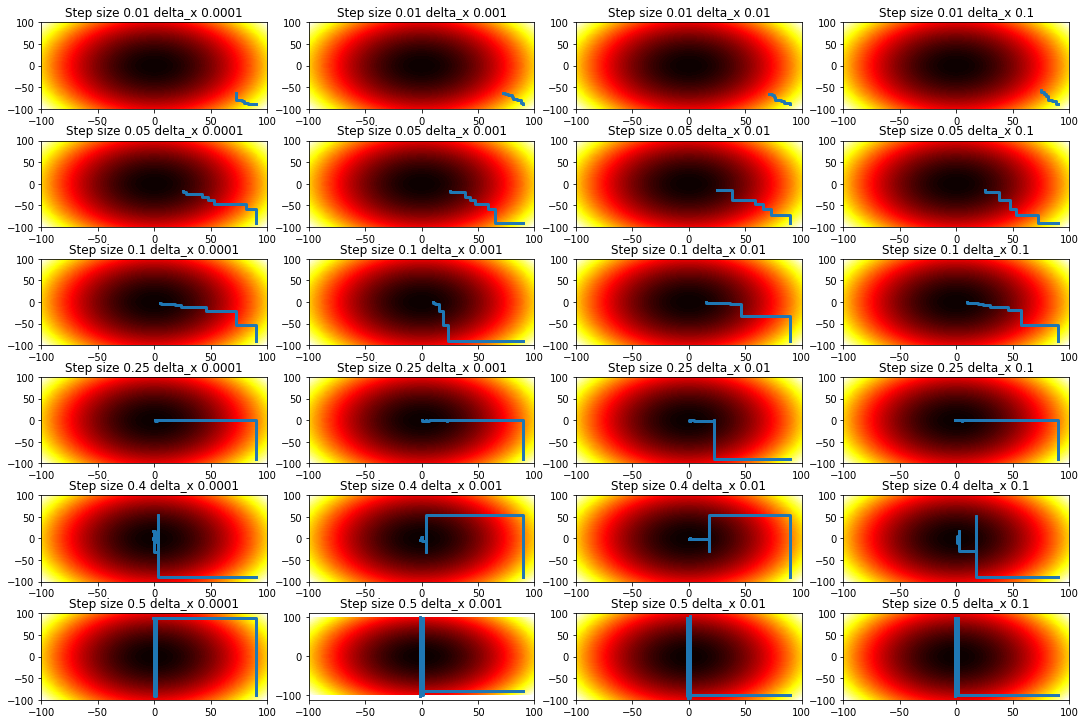

In [40]:
# PLEASE DO NOT REMOVE!
# Running the DFO algorithm with different step sizes
num_epochs = 20 # the number of epochs (you may change it!)

## PLEASE FILL IN
## Here all hyperparameters go.
## Please analyze at least one hyperparameter in a similar manner to the 
## step size in the GD algorithm.
# step sizes from GD cell
step_sizes = [0.01, 0.05, 0.1, 0.25, 0.4, 0.5] # the step sizes
delta_xs = [0.0001, 0.001, 0.01, 0.1] # the step sizes

## plotting the convergence of the DFO
## Please uncomment the two lines below, but please provide the number of axes (replace HERE appriopriately)
# plot each step size with different delta_x in one row
fig_dfo, axs = plt.subplots(len(step_sizes),len(delta_xs),figsize=(15, 10))
fig_dfo.tight_layout()

# the for-loop should go over (at least one) parameter(s) (replace HERE appriopriately)
# and uncomment the line below
for i in range(len(step_sizes)):
  for j in range(len(delta_xs)):

    ## PLEASE FILL IN
    # ...
    dfo = DFO(f, step_size=step_sizes[i], delta_x=delta_xs[j])
    # plot the convergence
    # please change the title accordingly!
    plot_optimization_process(axs[i][j], optimizer=dfo, title='Step size ' + str(step_sizes[i]) + ' delta_x ' + str(delta_xs[j]))

**Question 5 (0-0.5-1pt)** Please comment on the behavior of your DFO algorithm. What are the strong points? What are the (potential) weak points? During working on the algorithm, what kind of problems did you encounter?

**Answer:** 
My approach was close to Negative Hill Climbing using derivative information. The implementation has 2 different hyperparameters. One is step size other is the delta_x. Delta_x represents the infinitesimal change in the numerical calculation of the derivative. 
The behaviour of DFO algorithm was similar to what we observed in the gradient descent algorithm. If the step size is too small, the algorithm will not converge to the minimum. If the step size is too large, the algorithm will not converge to the minimum and will go out of the minimum area. Moreover, we can also observe the effect of delta_x. It does not affect the convergence to the minimum but it affects the speed of convergence.
Strong point of DFO is its easy to impelement. For the GD, we need for information of the function and its derivative in each dimension so that we can calculate it. However, this DFO is easly can be run with any function since the change is based on the numeric calculation of one-dimension gradient. Weak point is that it is require many evaluations of the function. Moreover, it is not guaranteed to converge to the minimum as we are randomly choosing the dimension to modify. Although since this is in a 2D space, it kind of creates the same effect as gradient descent algorithm in higher dimensions this is not the case as in each step only 1 dimension is modified and the other dimensions are fixed. Lastly, on the some hypermeters the shape is looks exactly like 'hill climbing' visualization in the lecture slides.

## 4. Final remarks: GD vs. DFO

Eventually, please answer the following last question that will allow you to conclude the assignment draw conclusions.

**Question 6 (0-0.5pt)**: What are differences between the two approaches?

**Answer**: 
One objective that is different that its implementation difficulties. In general, GD requires more computations and vector/matrix operations (multivariable calculus) than DFO. DFO in general contains a 'random' component that will cause the algorithm to converge to a different solution each time it is run and it is more uncertain to find a good solution than GD. Even though GD has hyperparameters that can be tuned, it is more deterministic and it is easier to find a good solution with more certainty. DFO has wider application areas like it works both on discrete and continuous problems whereas GD works for continous problems and the function should be smooth and differentiable (although some strategies might help with jump discountities).

**Question 7 (0-0.5)**: Which of the is easier to apply? Why? In what situations? Which of them is easier to implement in general?

**Answer**: In terms of implementations, DFO is eaiser to implement as GD needs to calculate the gradient of the function and DFO does not need to calculate the gradient. Although gradient calculation may seem easy in lower dimensions, it becomes more difficult as the number of dims increases. Also, some functions are hard to get derivative even only in a single dimension. However, with a easy to calculate gradient and in lower dimensions, GD might be good option instead of evaluating many times and having risk of not finding a good solution with DFO.